# From GSheets with 💖

Let's create your first ETL by transfering data to a Google Sheet to your Data Warehouse. For this exercise, we will be using this spreadsheet:

* [Financial Data](https://docs.google.com/spreadsheets/d/1npJZrNb30OgCpLTNEVwSQw1T6QqdQvdPbEDp8s3iNcg/edit?usp=sharing)

1. Copy this spreadsheet into your Google Drive to have **your own Google Spreadsheet**
2. Using FiveTran, create an ETL that transfer data from that spreadsheet to your data warehouse
3. Import pandas and visualize all the tables from the schema you set in your ETL connection

In [ ]:
import pandas as pd
from dotenv import load_dotenv   #for python-dotenv method
load_dotenv()                    #for python-dotenv method
import os


endpoint=os.environ.get("hostname_aws_postgres")
username=os.environ.get("username_aws_postgres")
password=os.environ.get("password_aws_postgres")

database = "postgres"
schema="google_sheets"
table = 'mytable'


connection = f"postgresql://{endpoint}/{database}?user={username}&password={password}"
df = pd.read_sql(f"SELECT * FROM information_schema.tables WHERE table_schema='{schema}'", con=connection)
df


,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,postgres,google_sheets,mytable,BASE TABLE,None,None,None,None,None,YES,NO,None


4. Import now your dataset into a `pandas` DataFrame

In [14]:
df = pd.read_sql(f"SELECT * FROM {schema}.{table}", con=connection)
df

,_row,_fivetran_synced,jul,account,oct,feb,apr,jun,dec,may,businees_unit,scenario,aug,year,nov,jan,currency,mar,sep
0,189,2024-11-28 15:35:10.939000+00:00,-588651,Marketing Expense,-576820,-522414,-499668,-719662,-563187,-604911,Hardware,Actuals,-600730,2018,-783592,-549275,USD,-595592,-590466
1,203,2024-11-28 15:35:10.940000+00:00,-276387,Travel & Entertainment Expense,-199198,-221176,-239313,-145469,-156797,-173459,Advertising,Actuals,-181197,2019,-173160,-232296,USD,-259024,-167260
2,233,2024-11-28 15:35:10.940000+00:00,-1201477,Software/Hardware Expense,-1029583,-1377291,-2080797,-1790551,-971165,-912271,Advertising,Actuals,-1331378,2020,-1099874,-1691907,USD,-1682587,-1375724
3,159,2024-11-28 15:35:10.939000+00:00,-1814752,R&D Expense,-853717,-1019814,-1679837,-1541375,-1425518,-1135315,Hardware,Actuals,-836674,2017,-1294484,-1635112,USD,-1426689,-1253636
4,247,2024-11-28 15:35:10.941000+00:00,-8102482,Payroll Expense,-6623440,-6651645,-9866087,-7190572,-8483908,-7274833,Software,Actuals,-10459385,2021,-9176467,-6051302,USD,-8229415,-8592628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,269,2024-11-28 15:35:10.941000+00:00,-2010684,Software/Hardware Expense,-1232918,-1758305,-2948387,-1705036,-2009167,-1767142,Hardware,Actuals,-2567132,2021,-2637095,-1892953,USD,-2114471,-2136189
293,265,2024-11-28 15:35:10.941000+00:00,-2434704,Payroll Expense,-1753146,-2272245,-4039512,-2743062,-2534072,-2624973,Hardware,Actuals,-4055672,2021,-3557338,-2444611,USD,-2641782,-3164216
294,261,2024-11-28 15:35:10.941000+00:00,-377198,Marketing Expense,-327293,-303363,-533856,-307618,-381235,-456091,Advertising,Actuals,-633324,2021,-523231,-256750,USD,-358131,-439078
295,273,2024-11-28 15:35:10.941000+00:00,-4751711,Commissions Expense,-2929053,-2612821,-4206639,-3390988,-3591506,-3635596,Software,Actuals,-3385162,2022,-4196677,-3477740,USD,-3043000,-2396080


In [19]:
df['sum']=df.apply(lambda x : x['jan']+x['feb']+x['mar']+x['apr']+x['may']+x['jun']+x['jul']+x['aug']+x['sep']+x['oct']+x['nov']+x['dec'], axis=1)

In [41]:
df_total_sales = pd.DataFrame(df.groupby(['year'])['sum'].sum())


In [40]:
df_total_sales

,sum
year,
2012,267084281
2013,262251784
2014,232336858
2015,254269986
2016,279777704
2017,279462000
2018,245079725
2019,276712132
2020,231748250


5. With some preprocessing get a dataframe that show the **sum of sales yearly**

In [32]:
df.groupby(['year'])['sum'].sum()

year
2012    267084281
2013    262251784
2014    232336858
2015    254269986
2016    279777704
2017    279462000
2018    245079725
2019    276712132
2020    231748250
2021    246138623
2022    270146778
Name: sum, dtype: int64

6. Using `plotly` visualize sales over year **directly from your data warehouse** like the below graph

In [55]:
import plotly.express as px

df_direct = pd.read_sql(f"SELECT year, sum(jan+feb+mar+apr+may+jun+jul+aug+sep+oct+nov+dec) FROM {schema}.{table} group by year", con=connection)


fig = px.bar(df_direct, x='year', y='sum')
fig.show()

4. 2023 financial data arrived on this spreadsheet - [2023 Forecast](https://docs.google.com/spreadsheets/d/1m5QOsJqruUP4IwCvcY9yBp2KPR87yhmDsZGndxZt8y0/edit?usp=sharing). Again copy the data into your sheet **connected to Fivetran** 

5. Rerun another ETL

6. Rerun your visualization without touching the code, what do you see?

In [56]:
df_direct_2 = pd.read_sql(f"SELECT year, sum(jan+feb+mar+apr+may+jun+jul+aug+sep+oct+nov+dec) FROM {schema}.{table} group by year", con=connection)


fig = px.bar(df_direct_2, x='year', y='sum')
fig.show()

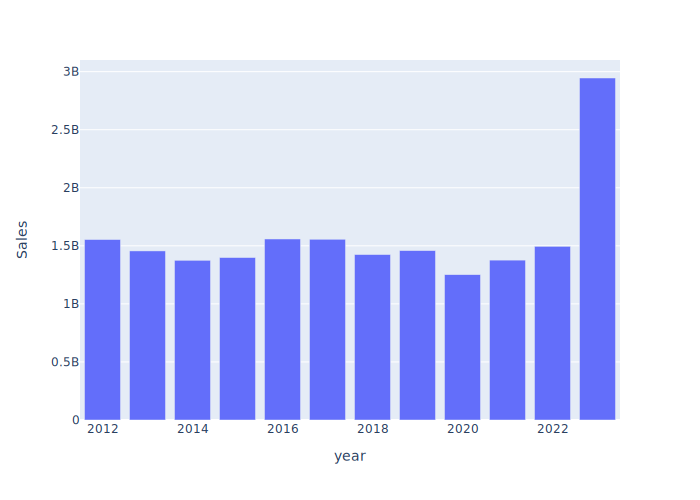